## ITI Porject - Datasets

### 1. Import Required Libraries

In [44]:
!pip install kneed

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\moham\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# prepare data
import pandas as pd 
import numpy as np 
from scipy import stats

# visualization
from matplotlib import pyplot as plt 
import seaborn as sns

# split data and handel 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder ,StandardScaler
from sklearn.decomposition import PCA

# models - supervised
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB

# models - unsupervised
from kneed import KneeLocator  
from sklearn.cluster import KMeans

# evaluation 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error 

### 2. Read the Dataset

In [46]:
# user choose any dataset and must show regression or classification or unsupervise
# depend on this show algorithms will show 
data_path = r'C:\Users\moham\Desktop\ITI AI\Sessions\session 12\Heart_Data.csv'
df = pd.read_csv(data_path) 

In [47]:
# show head for user
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,No Disease
1,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0,No Disease
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,No Disease
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,No Disease
4,62.0,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,1.0,3.0,2.0,No Disease


### 3. Analyze the Data - (for you not user)

In [48]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1033 non-null   float64
 1   sex       1030 non-null   float64
 2   cp        1032 non-null   float64
 3   trestbps  1032 non-null   float64
 4   chol      1034 non-null   float64
 5   fbs       1034 non-null   float64
 6   restecg   1034 non-null   float64
 7   thalach   1038 non-null   float64
 8   exang     1036 non-null   float64
 9   oldpeak   1035 non-null   float64
 10  slope     1035 non-null   float64
 11  ca        1039 non-null   float64
 12  thal      1037 non-null   float64
 13  target    1034 non-null   object 
dtypes: float64(13), object(1)
memory usage: 114.4+ KB


In [49]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,1033.000000,1030.000000,1032.000000,1032.000000,1034.000000,1034.000000,1034.000000,1038.000000,1036.000000,1035.000000,1035.000000,1039.000000,1037.000000
mean,54.356244,0.696117,0.942829,131.521318,246.401354,0.152805,0.528046,149.230250,0.338803,1.072077,1.387440,0.749759,2.322083
std,9.092382,0.460156,1.031806,17.525581,51.700403,0.359973,0.527727,22.944652,0.473531,1.172065,0.615434,1.029871,0.620145
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,276.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [50]:
last_col = df.iloc[:, -1]
last_col

0       No Disease
1       No Disease
2       No Disease
3       No Disease
4       No Disease
           ...    
1040       Disease
1041    No Disease
1042       Disease
1043    No Disease
1044       Disease
Name: target, Length: 1045, dtype: object

In [51]:
df['target'] # will use some dataset target at last one to show for user 

0       No Disease
1       No Disease
2       No Disease
3       No Disease
4       No Disease
           ...    
1040       Disease
1041    No Disease
1042       Disease
1043    No Disease
1044       Disease
Name: target, Length: 1045, dtype: object

### 4. Data Preprocessing - (for you not show for user)

#### 4.1 Check Columns

In [52]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

#### 4.2 Check missing valuse

In [53]:
df.isnull().sum()

age         12
sex         15
cp          13
trestbps    13
chol        11
fbs         11
restecg     11
thalach      7
exang        9
oldpeak     10
slope       10
ca           6
thal         8
target      11
dtype: int64

In [54]:
numeric_columns = [] # for scalling 
cols_with_nulls = df.columns[df.isnull().sum() > 0].tolist() 

In [55]:
for col in cols_with_nulls:
    if pd.api.types.is_numeric_dtype(df[col]):  
        # numeric columns 
        value = df[col].mean()
        df[col].fillna(value, inplace=True)
        numeric_columns.append(col)  
        print(f"Filled {col} with Mean")
    else:
        # categorical columns 
        value = df[col].mode()[0]
        df[col].fillna(value, inplace=True)
        print(f"Filled {col} with Mode") 

Filled age with Mean
Filled sex with Mean
Filled cp with Mean
Filled trestbps with Mean
Filled chol with Mean
Filled fbs with Mean
Filled restecg with Mean
Filled thalach with Mean
Filled exang with Mean
Filled oldpeak with Mean
Filled slope with Mean
Filled ca with Mean
Filled thal with Mean
Filled target with Mode


C:\Users\moham\AppData\Local\Temp\ipykernel_35332\971459048.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(value, inplace=True)


In [56]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### 4.3 Check duplication 

In [57]:
df.duplicated().sum() 

np.int64(619)

In [58]:
df.drop_duplicates(inplace=True) 

In [59]:
df.duplicated().sum() 

np.int64(0)

#### 4.4 Handel categorical data 

In [60]:
# must show to if map or handel categorical data 
df['target'] = df['target'].map({'Disease': 1, 'No Disease': 0} )

In [ ]:
target_col = df.columns[-1]

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
if target_col in categorical_cols:
    categorical_cols.remove(target_col)

for col in categorical_cols:
    unique_vals = df[col].nunique()
    if unique_vals <= 10:  
        df = pd.get_dummies(df, columns=[col], drop_first=True)
        print(f"OneHot Encoding applied to {col} ({unique_vals} categories).")
    else: 
        df[col] = LabelEncoder().fit_transform(df[col])
        print(f"Label Encoding applied to {col} ({unique_vals} categories).")


In [61]:
df.head() # Show data for user after processing 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,0
1,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,0
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,0
4,62.0,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,1.0,3.0,2.0,0


#### 4.5 Handel Outliers

In [ ]:
if numeric_columns:
    before_shape = df.shape
    df = df[(np.abs(stats.zscore(df[numeric_columns])) < 3).all(axis=1)]
    after_shape = df.shape
    print(f"✅ Outliers removed automatically. Shape before: {before_shape}, after: {after_shape}")

### 5. Split Data into Features and Target - (Last column is target)

In [62]:
x = df.drop(columns=['target'])
y = df['target']

In [63]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52.000000,1.0,0.000000,125.000000,212.0,0.0,1.0,168.0,0.000000,1.0,2.0,2.0,3.0
1,53.000000,1.0,0.000000,140.000000,203.0,1.0,0.0,155.0,1.000000,3.1,0.0,0.0,3.0
2,70.000000,1.0,0.000000,145.000000,174.0,0.0,1.0,125.0,1.000000,2.6,0.0,0.0,3.0
3,61.000000,1.0,0.000000,148.000000,203.0,0.0,1.0,161.0,0.000000,0.0,2.0,1.0,3.0
4,62.000000,0.0,0.000000,138.000000,294.0,1.0,1.0,106.0,0.000000,1.9,1.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,54.000000,1.0,0.000000,120.000000,188.0,0.0,1.0,113.0,0.000000,1.4,1.0,1.0,3.0
1006,58.000000,1.0,2.000000,140.000000,211.0,1.0,0.0,165.0,0.338803,0.0,2.0,0.0,2.0
1012,54.356244,1.0,1.000000,110.000000,229.0,0.0,1.0,168.0,0.000000,1.0,0.0,0.0,3.0
1017,53.000000,1.0,0.000000,131.521318,282.0,0.0,1.0,95.0,1.000000,2.0,1.0,2.0,3.0


### 6. Split Data into Train and Test Sets - (for you not user )

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

In [65]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
69,62.0,0.0,0.0,160.0,164.0,0.000000,0.0,145.0,0.0,6.2,0.0,3.0,3.0
149,39.0,1.0,2.0,140.0,321.0,0.000000,0.0,182.0,0.0,0.0,2.0,0.0,2.0
285,71.0,0.0,2.0,110.0,265.0,1.000000,0.0,130.0,0.0,0.0,2.0,1.0,2.0
31,50.0,0.0,1.0,120.0,244.0,0.152805,1.0,162.0,0.0,1.1,2.0,0.0,2.0
91,62.0,0.0,0.0,124.0,209.0,0.000000,1.0,163.0,0.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,48.0,1.0,0.0,130.0,256.0,1.000000,0.0,150.0,1.0,0.0,2.0,2.0,3.0
116,63.0,1.0,0.0,130.0,254.0,0.000000,0.0,147.0,0.0,1.4,1.0,1.0,3.0
373,58.0,1.0,1.0,120.0,284.0,0.000000,0.0,160.0,0.0,1.8,1.0,0.0,2.0
616,43.0,1.0,0.0,115.0,303.0,0.000000,1.0,181.0,0.0,1.2,1.0,0.0,2.0


In [66]:
print("x_train shape = ", x_train.shape)
print("y_train shape = ", y_train.shape)
print("x_test shape = ", x_test.shape)
print("y_test shape = ", y_test.shape)

x_train shape =  (340, 13)
y_train shape =  (340,)
x_test shape =  (86, 13)
y_test shape =  (86,)


#### PCA

In [ ]:
if x_train.shape[1] > 10:
    pca = PCA(n_components=2)
    X_train = pca.fit_transform(x_train)
    X_test = pca.transform(x_train)
    print("✨ PCA applied automatically: Features reduced to 2 components.")

### 7. Modeling

#### 7.1 Scaling for numeric data

In [67]:
scaler = StandardScaler()
x_train[numeric_columns] = scaler.fit_transform(x_train[numeric_columns])
x_test[numeric_columns] = scaler.transform(x_test[numeric_columns])

#### 7.2 Supervised - regression 

##### 7.2.1 Linear Regression

In [68]:
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression()

In [69]:
y_pred_lin = lin_model.predict(x_test)

In [70]:
mse_lin = mean_squared_error(y_test, y_pred_lin)

##### 7.2.2 KNN

In [71]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsRegressor()

In [72]:
y_pred_knn = knn_model.predict(x_test)

In [73]:
mse_knn = mean_squared_error(y_test, y_pred_knn)

#### 7.3 Supervised - classification

##### 7.3.1 Naive bayse

In [74]:
naive_model = GaussianNB()
naive_model.fit(x_train , y_train)

GaussianNB()

In [75]:
y_pred_naive = naive_model.predict(x_test)

In [76]:
print(classification_report(y_test, y_pred_naive))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        45
           1       0.72      0.80      0.76        41

    accuracy                           0.76        86
   macro avg       0.76      0.76      0.76        86
weighted avg       0.76      0.76      0.76        86



<Axes: >

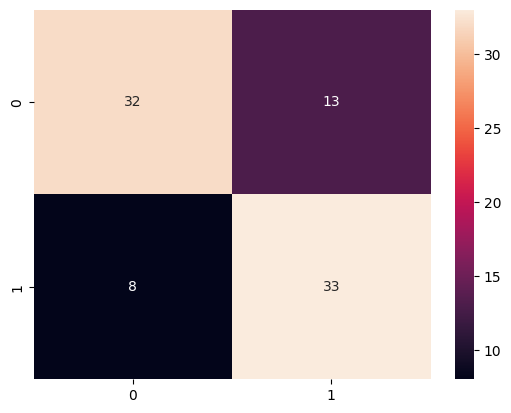

In [77]:
naive_matrix = confusion_matrix(y_test, y_pred_naive)
sns.heatmap(naive_matrix, annot=True, fmt='d', cbar=True)

In [78]:
acc_naive = accuracy_score(y_test, y_pred_naive)

##### 7.3.2 Decision tree 

In [79]:
tree_class = DecisionTreeClassifier()
tree_class.fit(x_train , y_train)

DecisionTreeClassifier()

In [80]:
y_pred_tree_class = tree_class.predict(x_test)

In [81]:
print(classification_report(y_test, y_pred_tree_class))

              precision    recall  f1-score   support

           0       0.87      0.73      0.80        45
           1       0.75      0.88      0.81        41

    accuracy                           0.80        86
   macro avg       0.81      0.81      0.80        86
weighted avg       0.81      0.80      0.80        86



<Axes: >

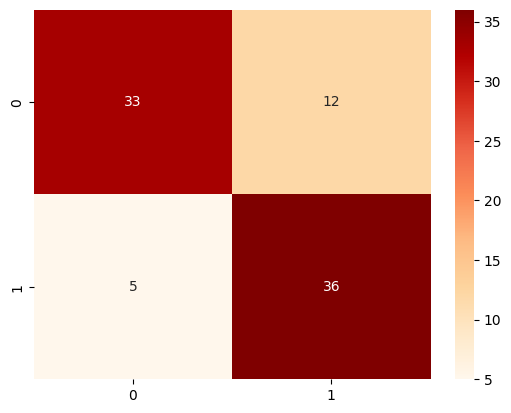

In [82]:
tree_matrix = confusion_matrix(y_test, y_pred_tree_class)
sns.heatmap(tree_matrix, annot=True, fmt='d',cmap='OrRd',cbar=True)

In [ ]:
acc_tree = accuracy_score(y_test, y_pred_tree_class)

#### 7.4 Unsupervised - KMeans

In [83]:
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [84]:
kl = KneeLocator(K, wcss, curve="convex", direction="decreasing")
best_k = kl.elbow
print("Best number of clusters:", best_k)

Best number of clusters: 3


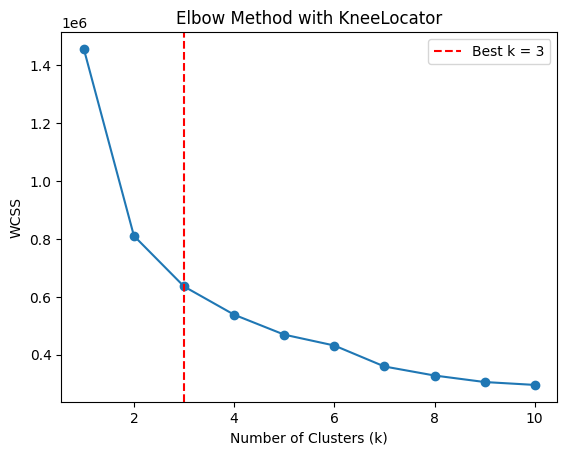

In [85]:
plt.plot(K, wcss, marker="o")
plt.axvline(best_k, color="red", linestyle="--", label=f"Best k = {best_k}")
plt.title("Elbow Method with KneeLocator")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.legend()
plt.show()

In [86]:
kmeans = KMeans(n_clusters=best_k, init="k-means++", random_state=42)

In [87]:
y_kmeans = kmeans.fit_predict(x)

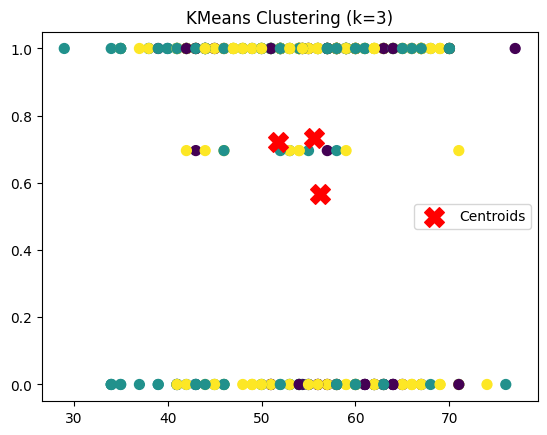

In [88]:
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y_kmeans, cmap="viridis", s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c="red", marker="X", label="Centroids")
plt.title(f"KMeans Clustering (k={best_k})")
plt.legend()
plt.show()